In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import holidays
import numpy as np
import tensorflow as tf

# Remplacez 'chemin/vers/votre/projet/module' par le chemin absolu réel vers le dossier "module" via la commande pwd
module_path = '/Users/eliotsouthon/Desktop/POC/POC/Code/Modules'  
sys.path.append(module_path)
import ma_bibliotheque 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

/Users/eliotsouthon/Desktop/POC/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
csv_file_paths=ma_bibliotheque.path_data('/Users/eliotsouthon/Desktop/POC/POC/Data/Data_gold')
# Affiche la liste des chemins pour vérifier
print("Liste des chemins des fichiers CSV :")
for path in csv_file_paths:
    print(path)

Liste des chemins des fichiers CSV :
/Users/eliotsouthon/Desktop/POC/POC/Data/Data_gold/e_w_1_51.csv


In [5]:
df=pd.read_csv(csv_file_paths[0], sep=';')
print(df.shape,df.head())

(26183, 10)    Consommation brute électricité (MW) - RTE    T     U   FF  country  scale  \
0                                     6894.5  1.9  85.0  1.2        1      5   
1                                     6855.0  0.0  91.0  0.0        1      5   
2                                     6484.0 -0.6  96.0  1.2        1      5   
3                                     6117.5 -1.7  95.0  0.0        1      5   
4                                     6016.5 -1.1  97.0  0.9        1      5   

   holiday  day  month  hours  
0        0    5      2     17  
1        0    5      2     18  
2        0    5      2     19  
3        0    5      2     20  
4        0    5      2     21  


In [6]:
# Normaliser les colonnes du DataFrame
scaler=MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_normalized.head())

   Consommation brute électricité (MW) - RTE         T         U        FF  \
0                                   0.732169  0.252016  0.829545  0.065217   
1                                   0.725054  0.213710  0.897727  0.000000   
2                                   0.658231  0.201613  0.954545  0.065217   
3                                   0.592219  0.179435  0.943182  0.000000   
4                                   0.574027  0.191532  0.965909  0.048913   

   country  scale  holiday       day     month     hours  
0      0.0    0.0      0.0  0.666667  0.090909  0.739130  
1      0.0    0.0      0.0  0.666667  0.090909  0.782609  
2      0.0    0.0      0.0  0.666667  0.090909  0.826087  
3      0.0    0.0      0.0  0.666667  0.090909  0.869565  
4      0.0    0.0      0.0  0.666667  0.090909  0.913043  


In [99]:
df.shape

(26183, 10)

In [5]:
pwd

'/Users/eliotsouthon/Desktop/POC/POC/Code'

  0%|          | 0/10 [00:00<?, ?it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Consommation_brute_électricité_(MW)_-_RTE.png


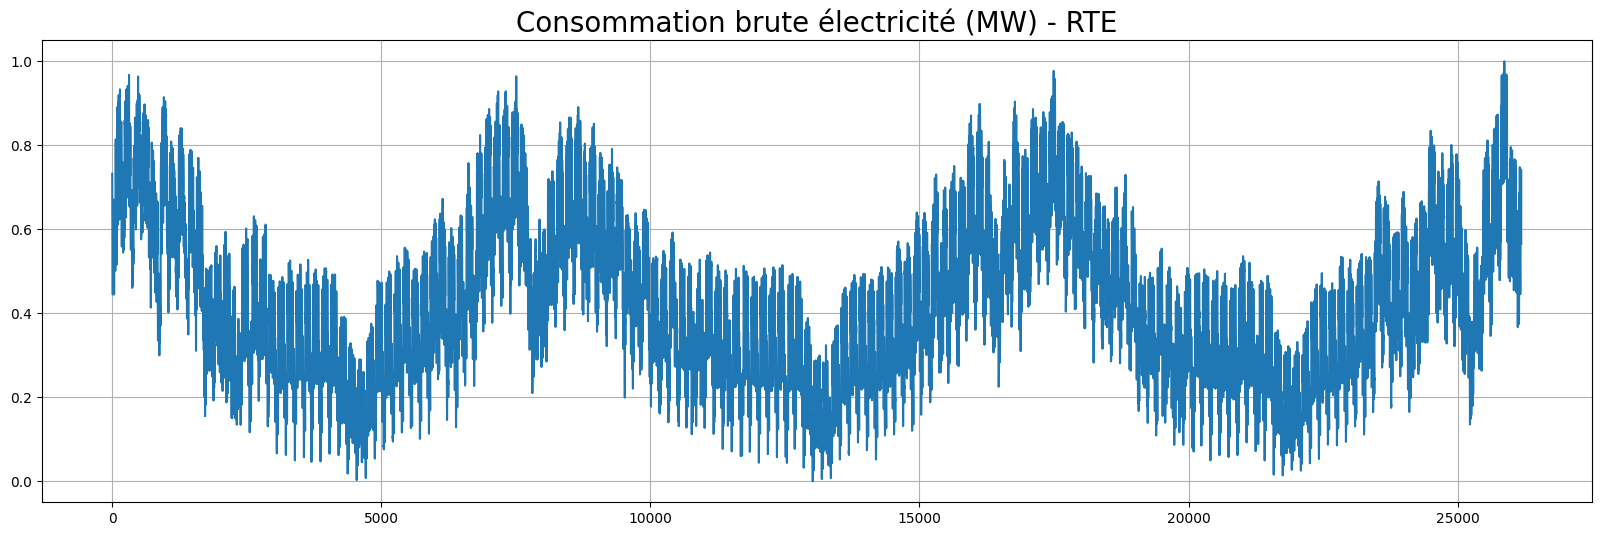

 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/T.png


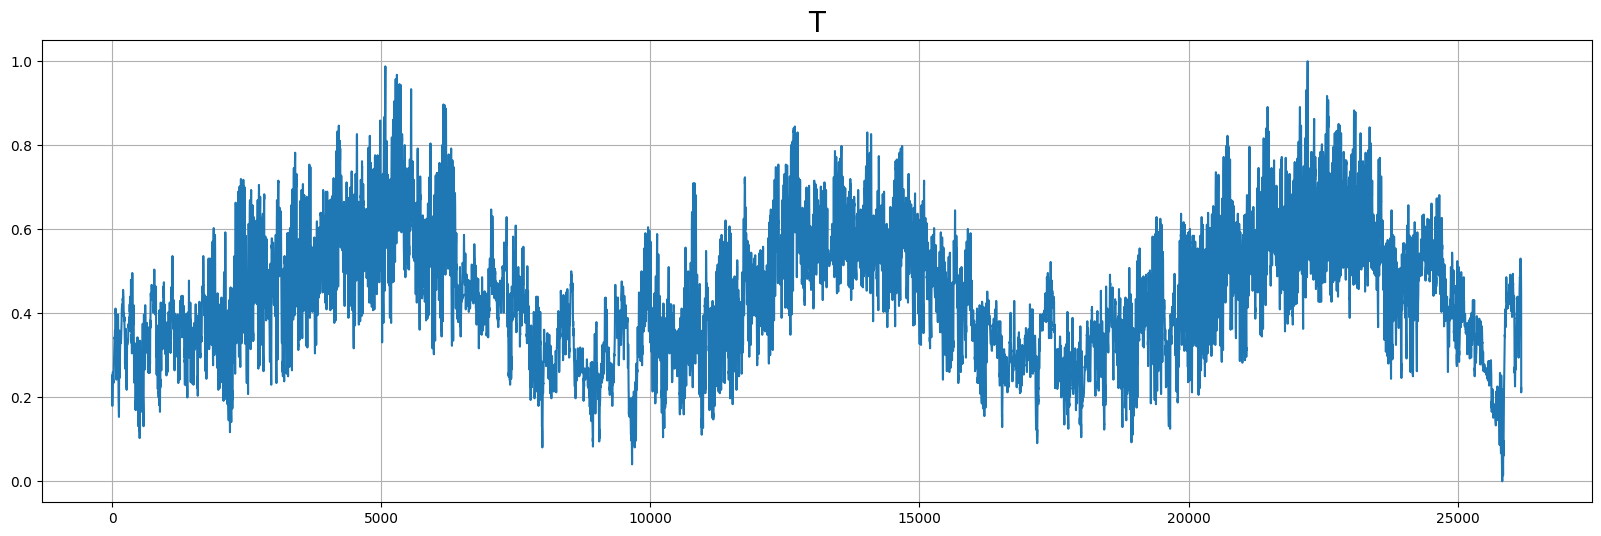

 20%|██        | 2/10 [00:00<00:03,  2.14it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/U.png


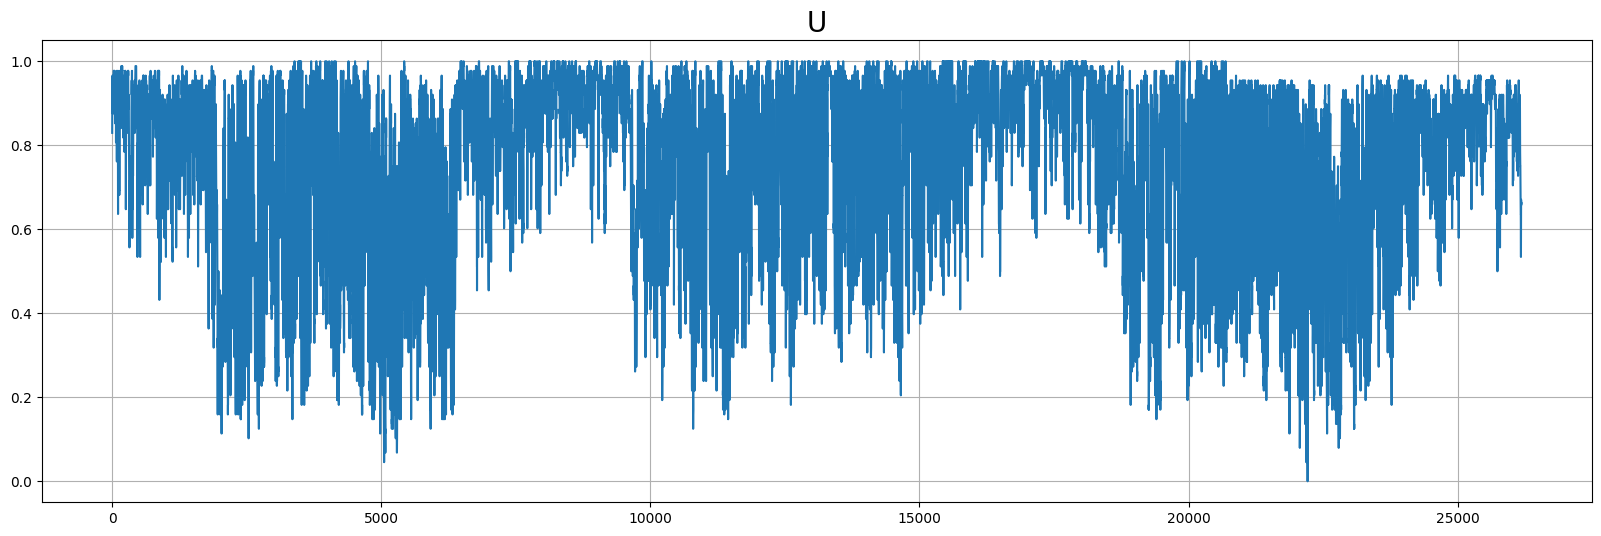

 30%|███       | 3/10 [00:01<00:03,  2.07it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/FF.png


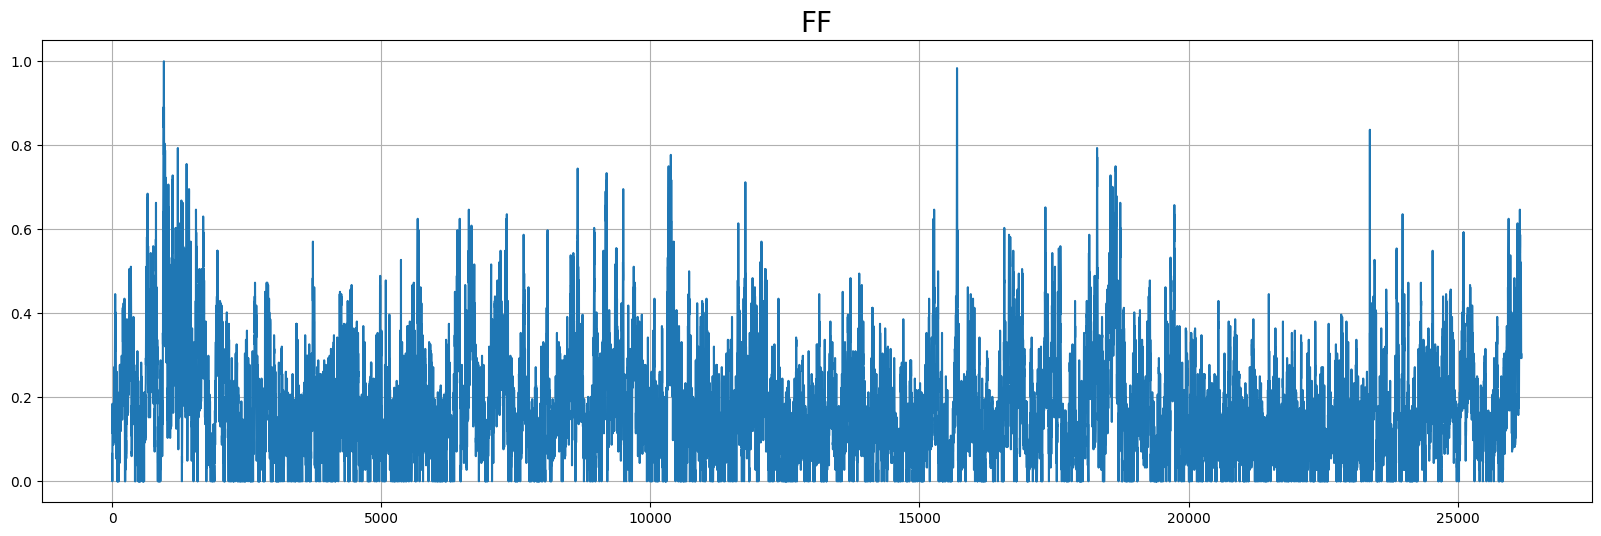

 40%|████      | 4/10 [00:01<00:02,  2.03it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/country.png


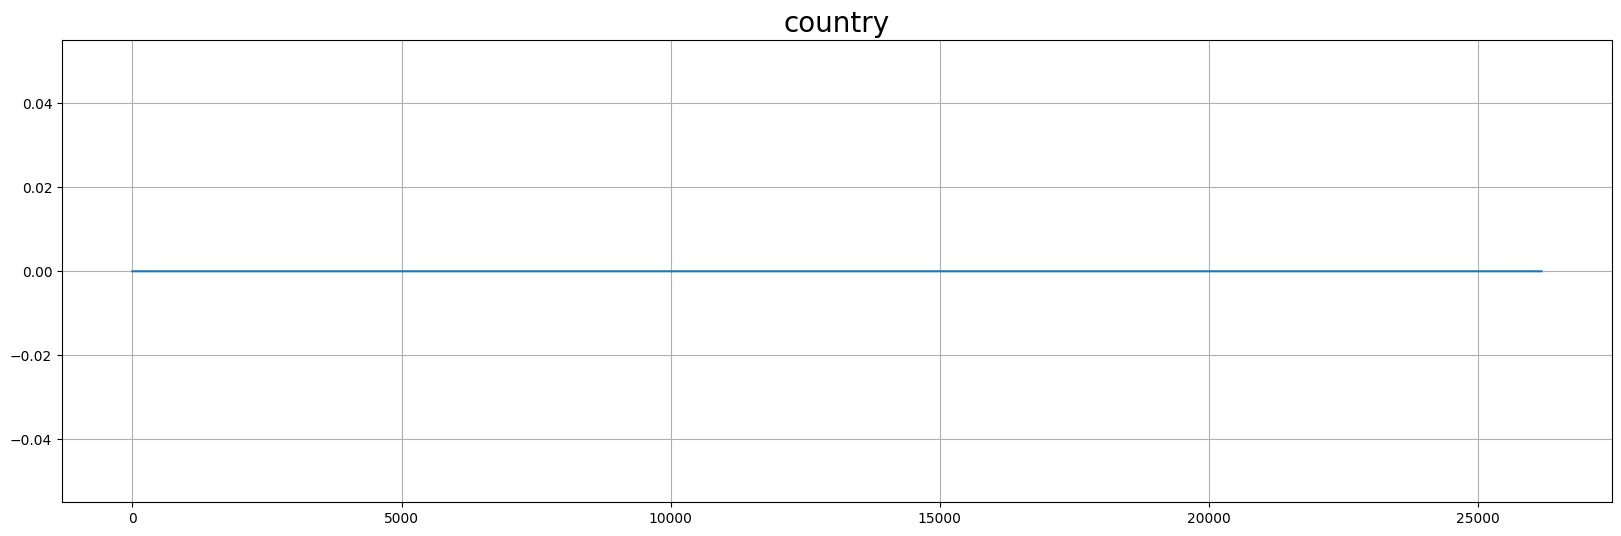

 50%|█████     | 5/10 [00:02<00:02,  2.44it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/scale.png


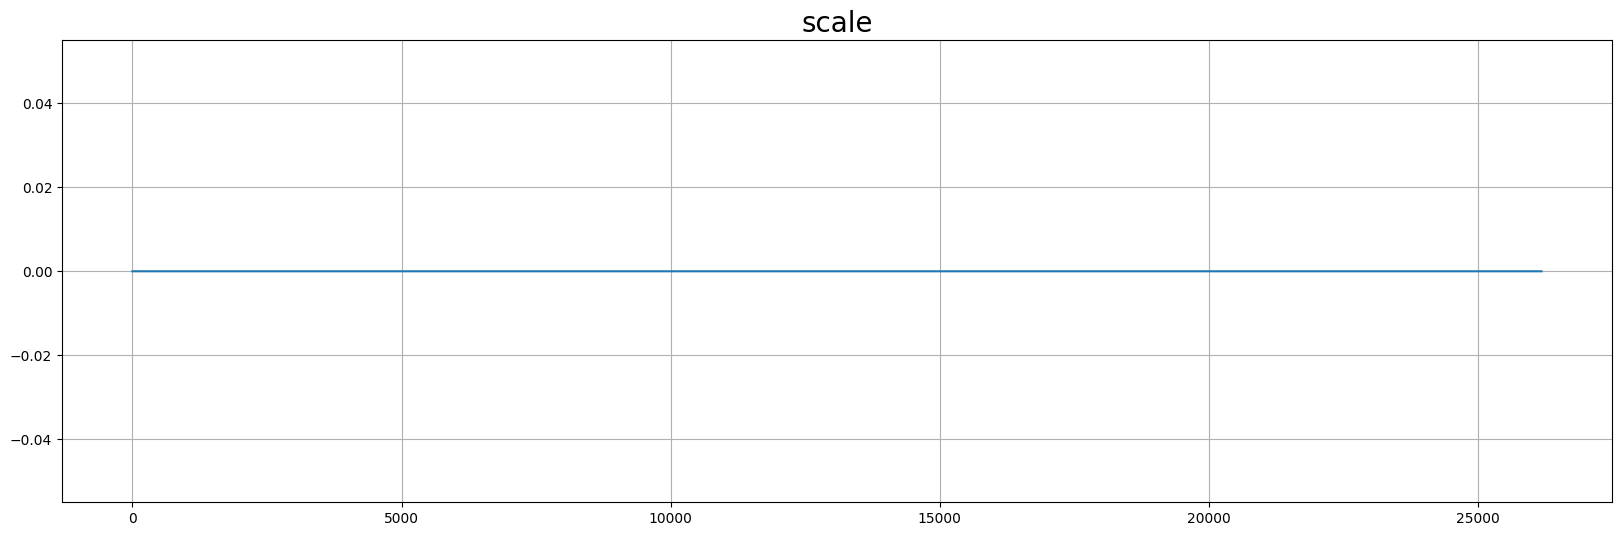

 60%|██████    | 6/10 [00:02<00:01,  2.77it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/holiday.png


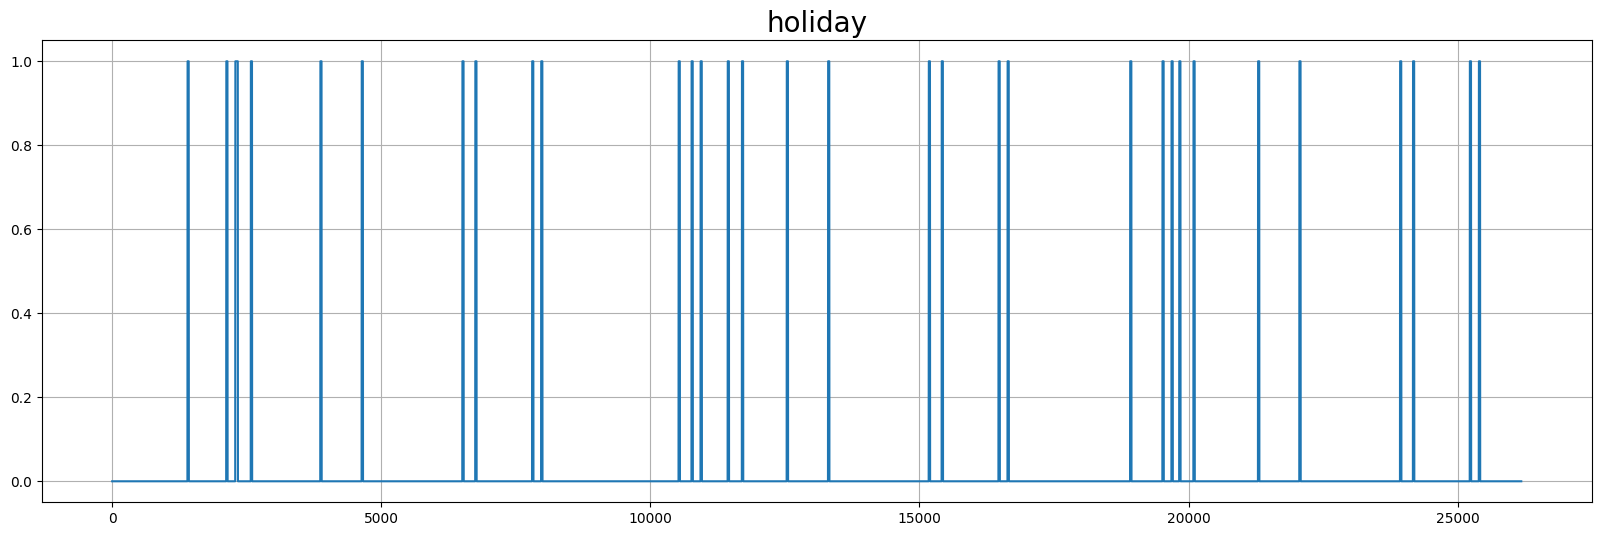

 70%|███████   | 7/10 [00:02<00:01,  2.97it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/day.png


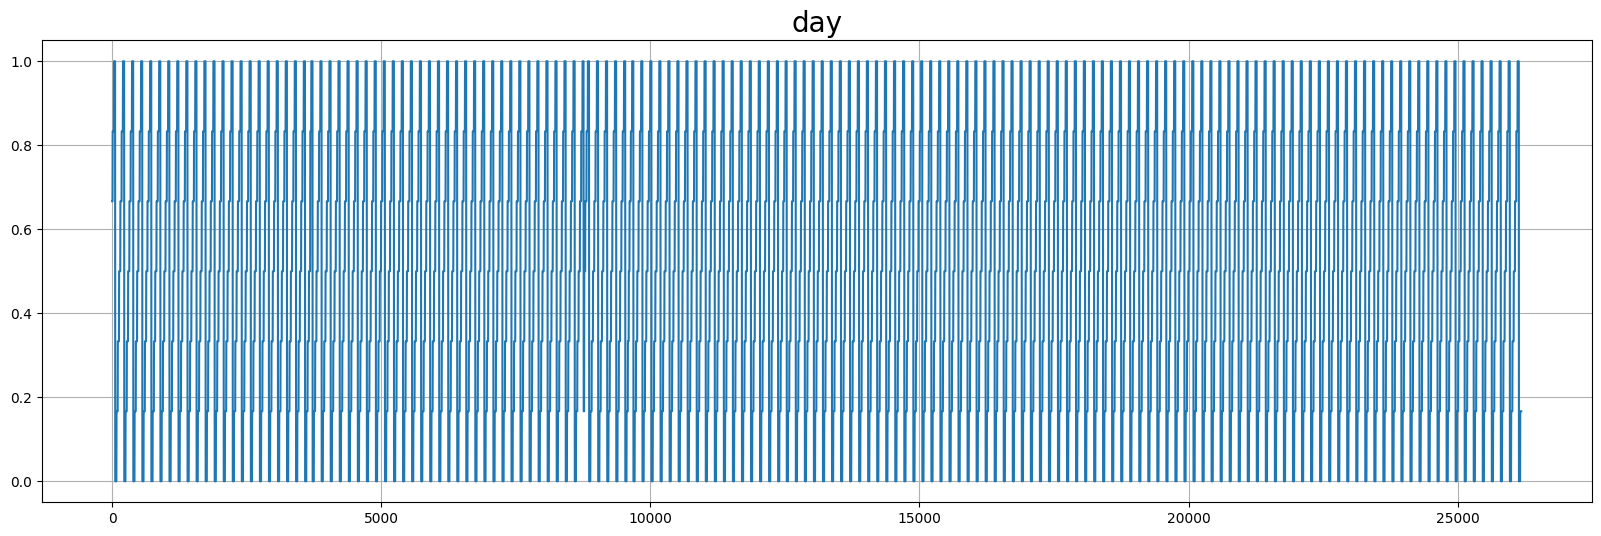

 80%|████████  | 8/10 [00:03<00:00,  2.65it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/month.png


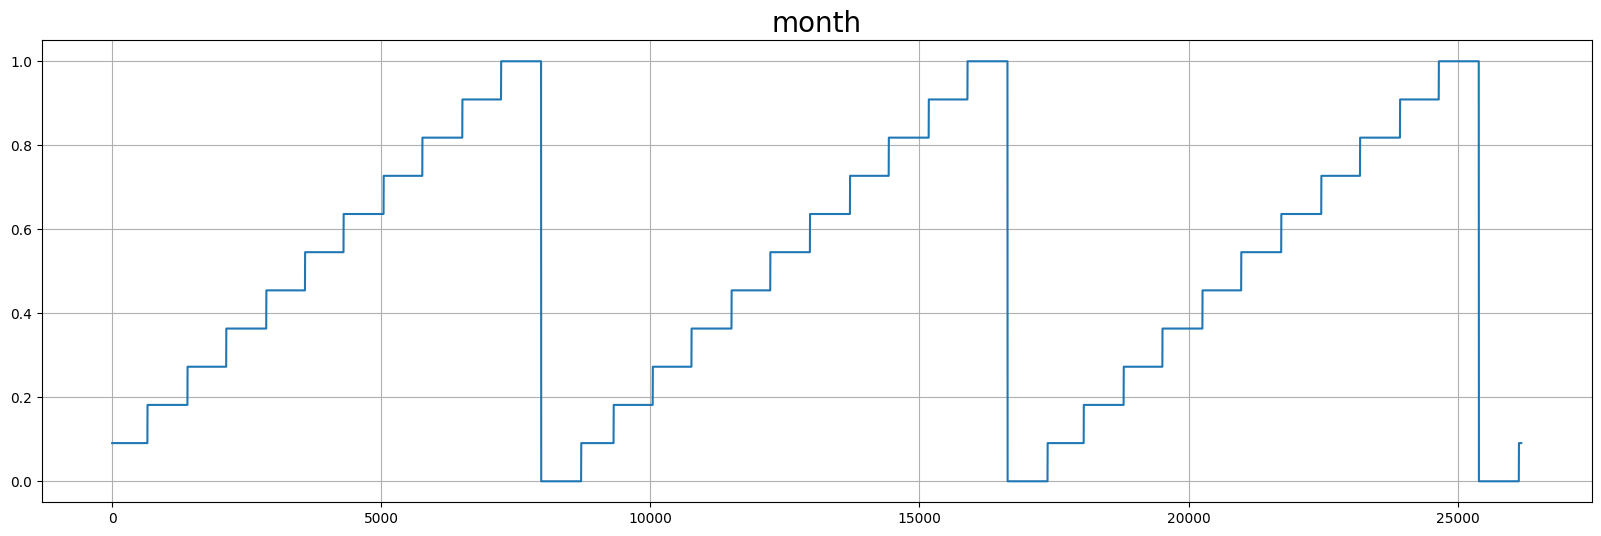

 90%|█████████ | 9/10 [00:03<00:00,  2.84it/s]

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/hours.png


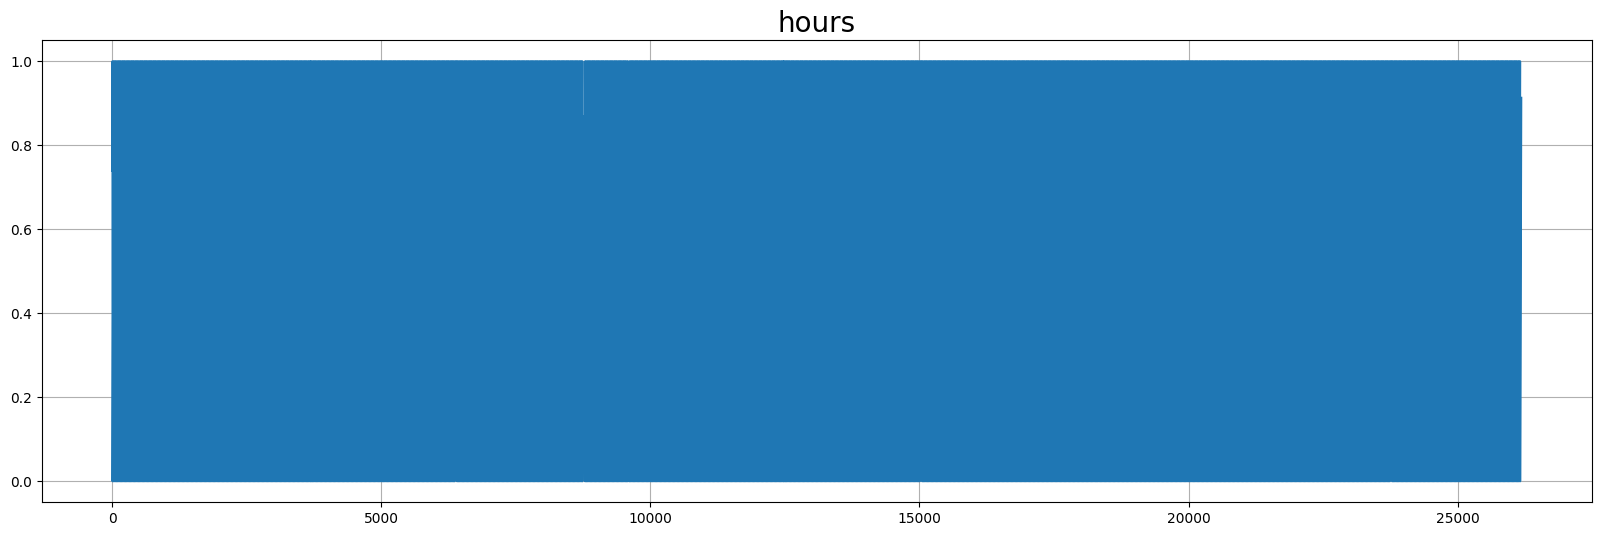

100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


In [6]:
for k in tqdm(range(len(df_normalized.columns))):
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(111)
    colonne=df_normalized.iloc[:,k]
    colonne.plot(ax=ax)
    plt.title(df_normalized.columns[k], fontsize=20)
    plt.grid(True)
    title = plt.gca().get_title()
    output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
    ma_bibliotheque.save_figure(title, output_dir)
    plt.show()

In [7]:
def split_data(data, test_size=0.25):
    """
    splits data to training and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    df_train, df_test = data.iloc[:ntest], data.iloc[ntest:]
    return df_train, df_test

df_train, df_test = split_data(df_normalized, test_size=0.33)

In [8]:
# Il faut que la consommation, le label soit en première position, index 0

x_train_scaled = np.asarray(df_train.iloc[:,1:]) #Selectionne toutes les lignes 
x_test_scaled = np.asarray(df_test.iloc[:,1:])     #et les colonnes a partir de l'index 1
y_train_scaled = np.asarray(df_train.iloc[:,0]) 
y_test_scaled = np.asarray(df_test.iloc[:,0])

In [9]:
print(len(x_train_scaled))
print(len(x_test_scaled))
print(len(y_train_scaled))
print(len(y_test_scaled))

17543
8640
17543
8640


In [10]:
features = df_normalized.columns
features =features[1:]
print(features)

labels=df_normalized.columns
labels=labels[0]
print(labels)

Index(['T', 'U', 'FF', 'country', 'scale', 'holiday', 'day', 'month', 'hours'], dtype='object')
Consommation brute électricité (MW) - RTE


Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/T.png


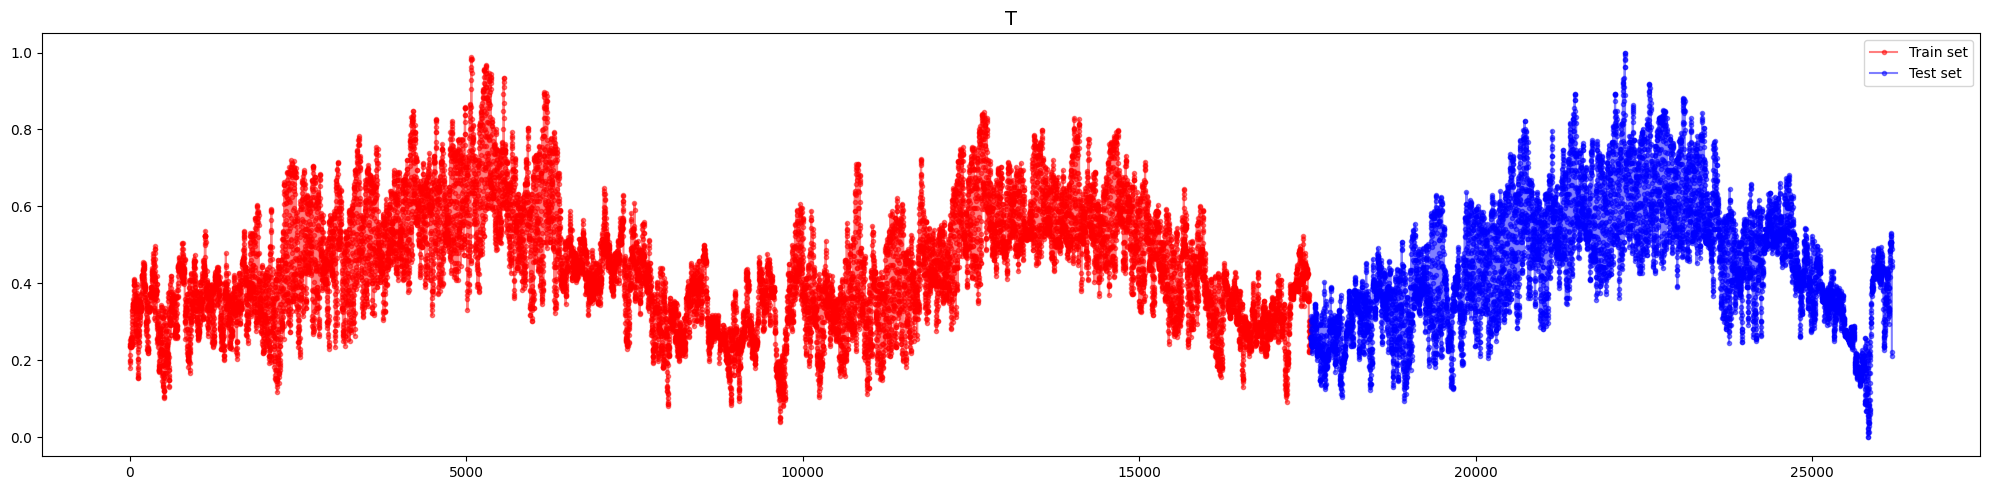

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/U.png


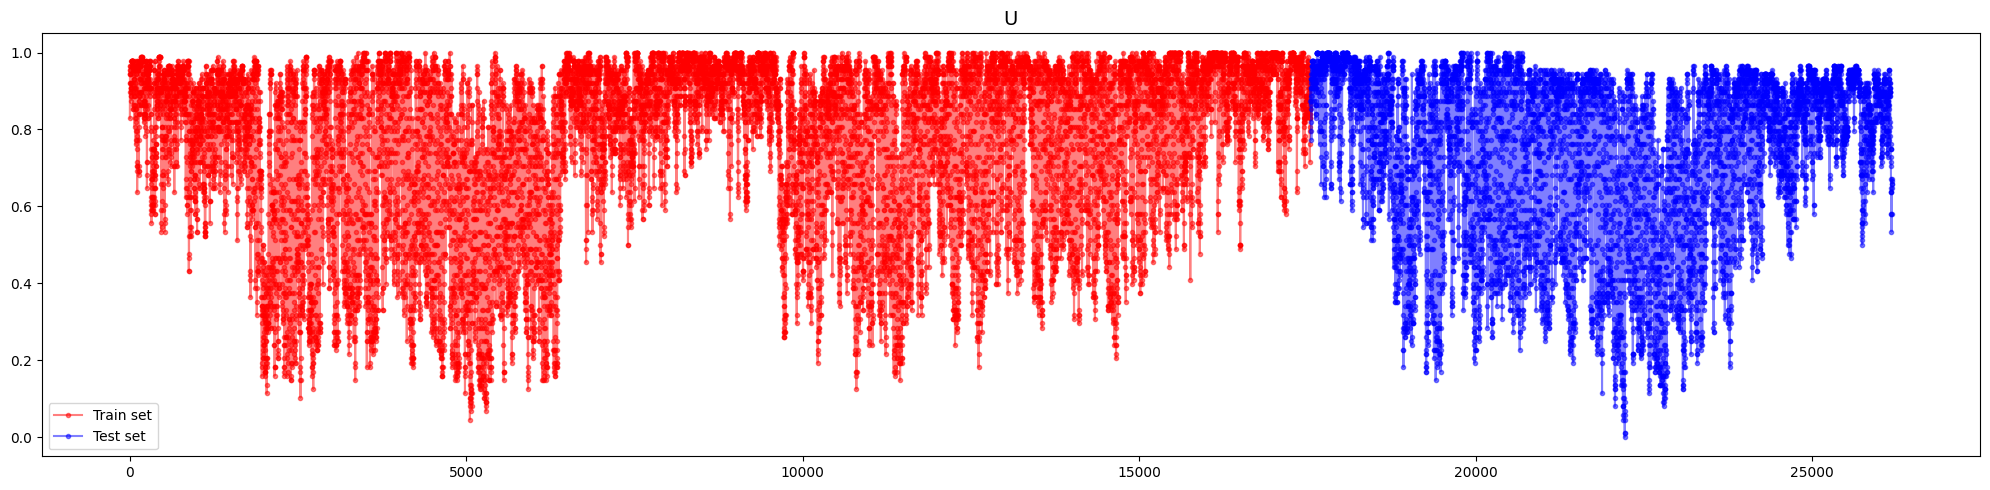

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/FF.png


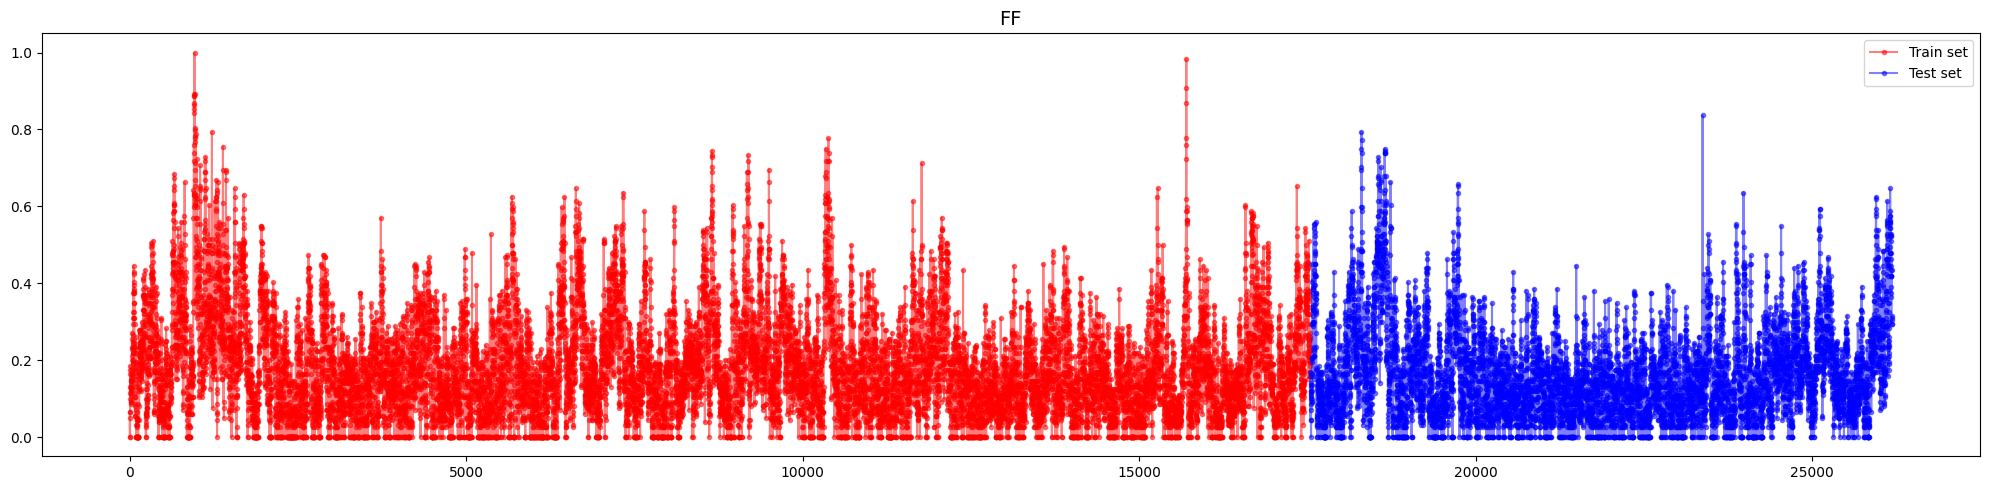

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/country.png


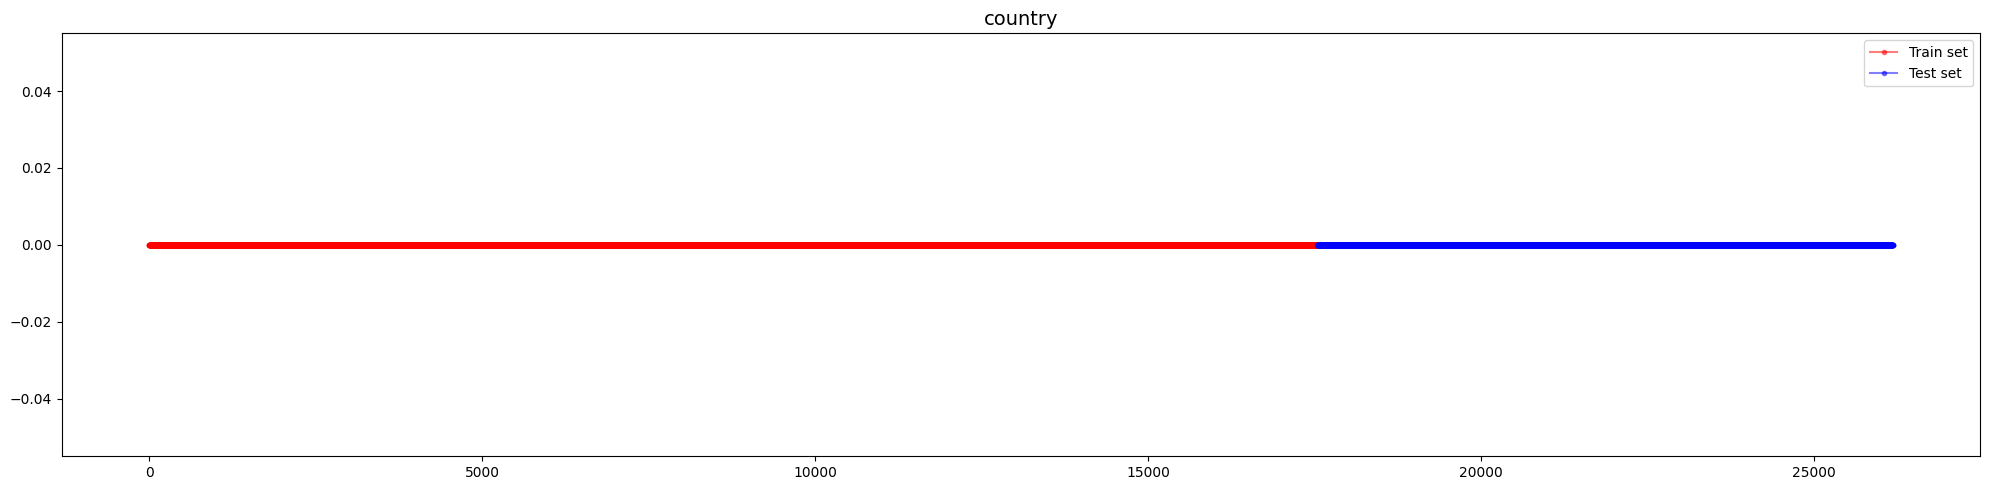

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/scale.png


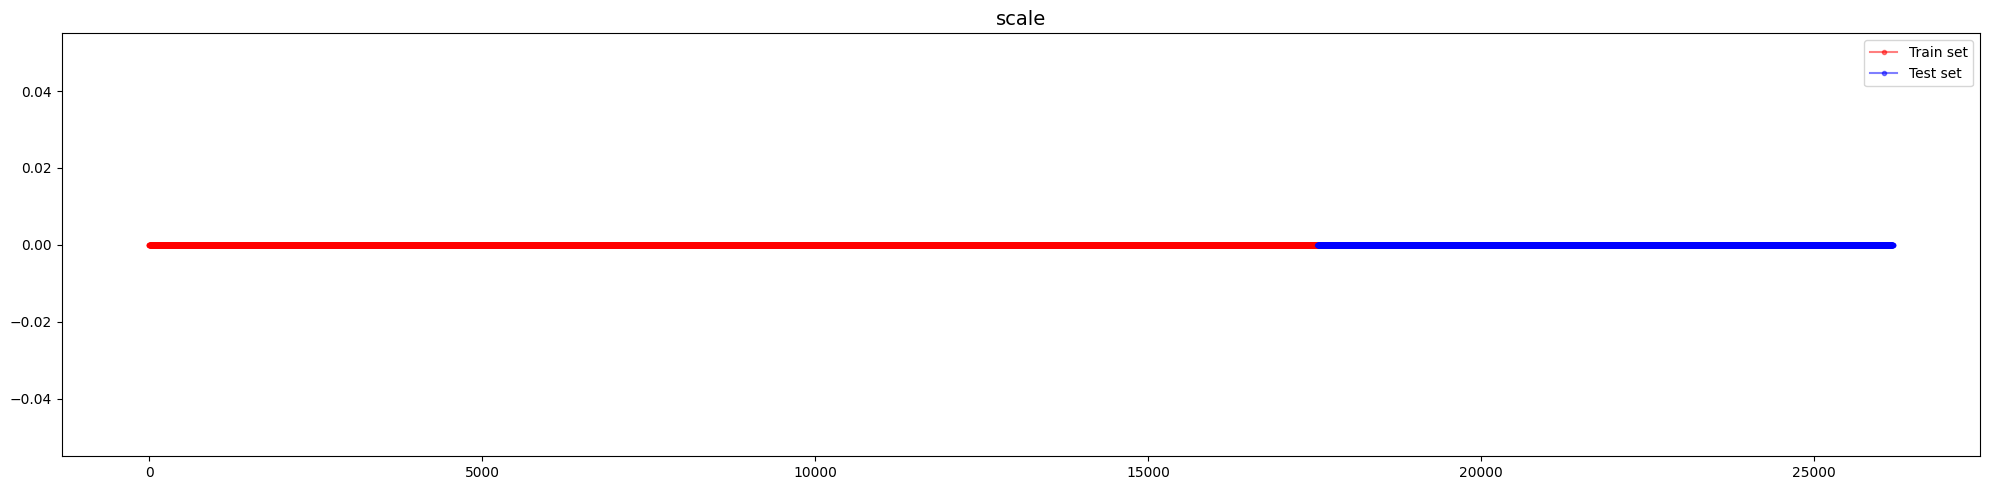

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/holiday.png


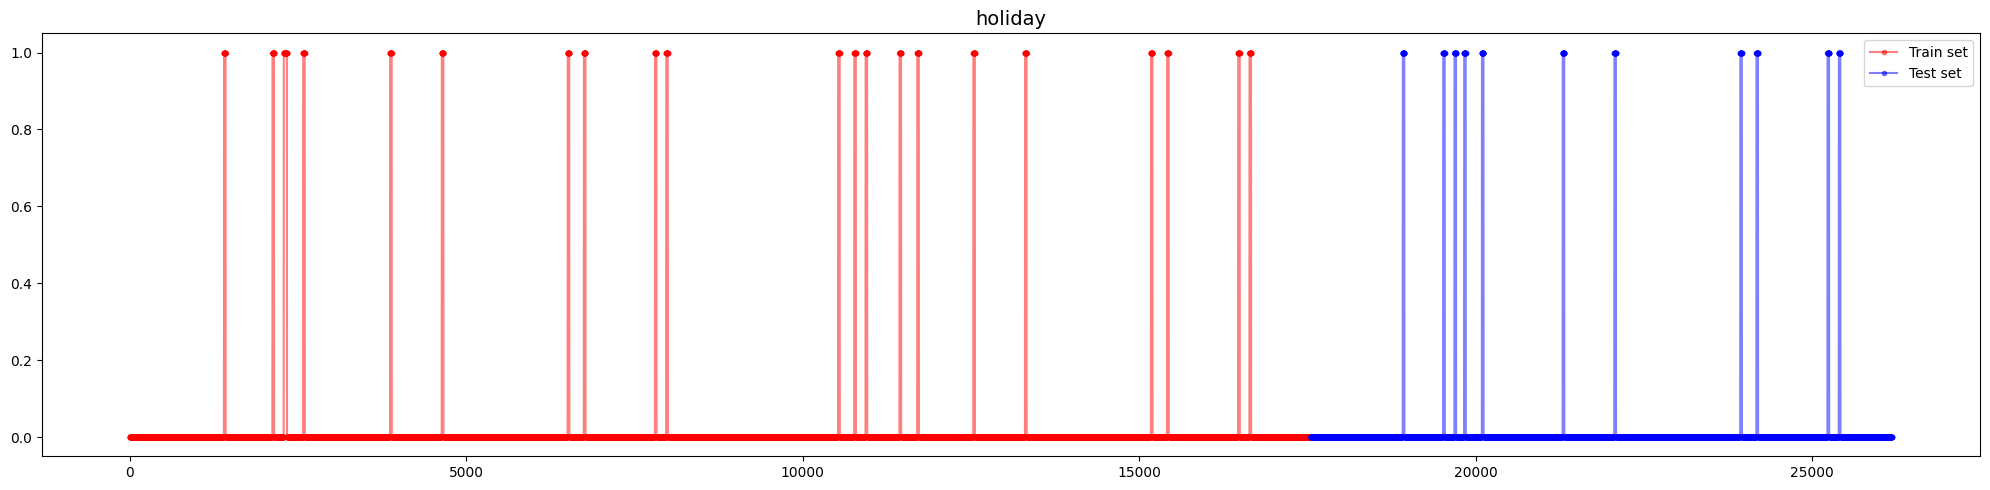

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/day.png


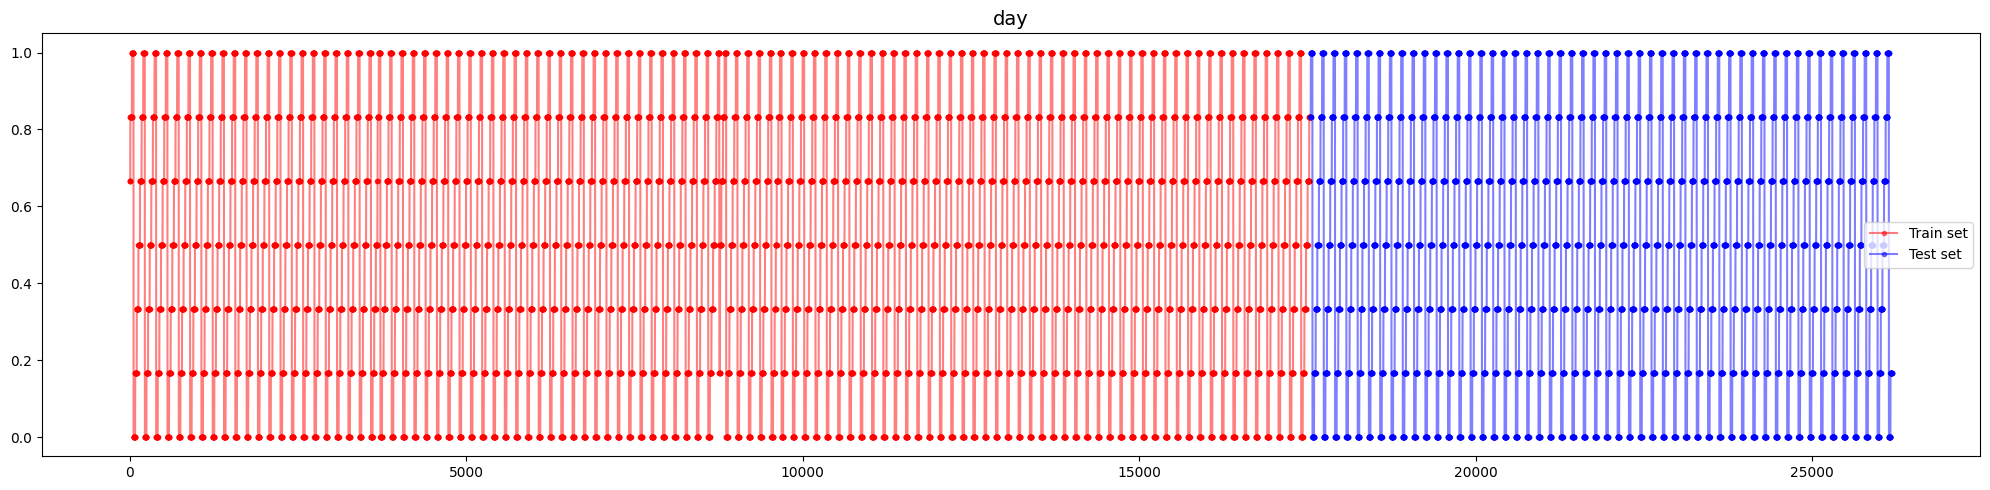

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/month.png


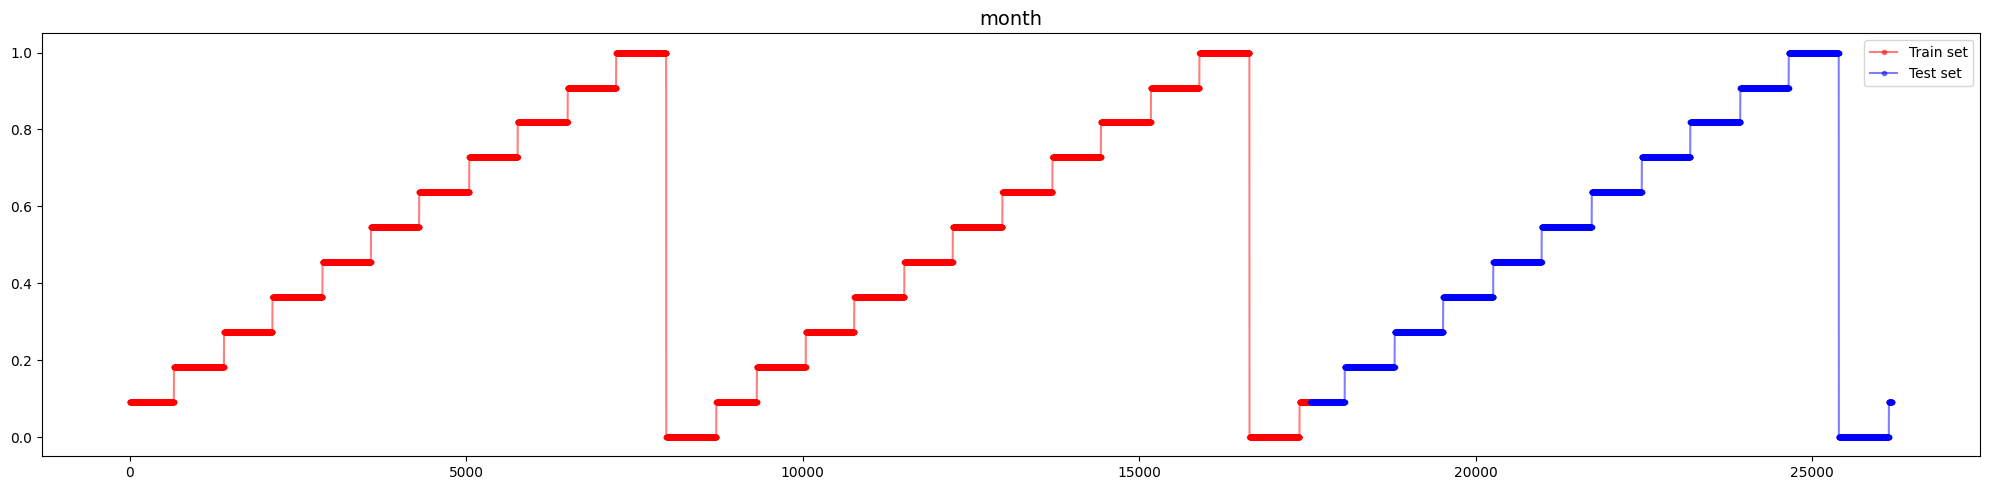

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/hours.png


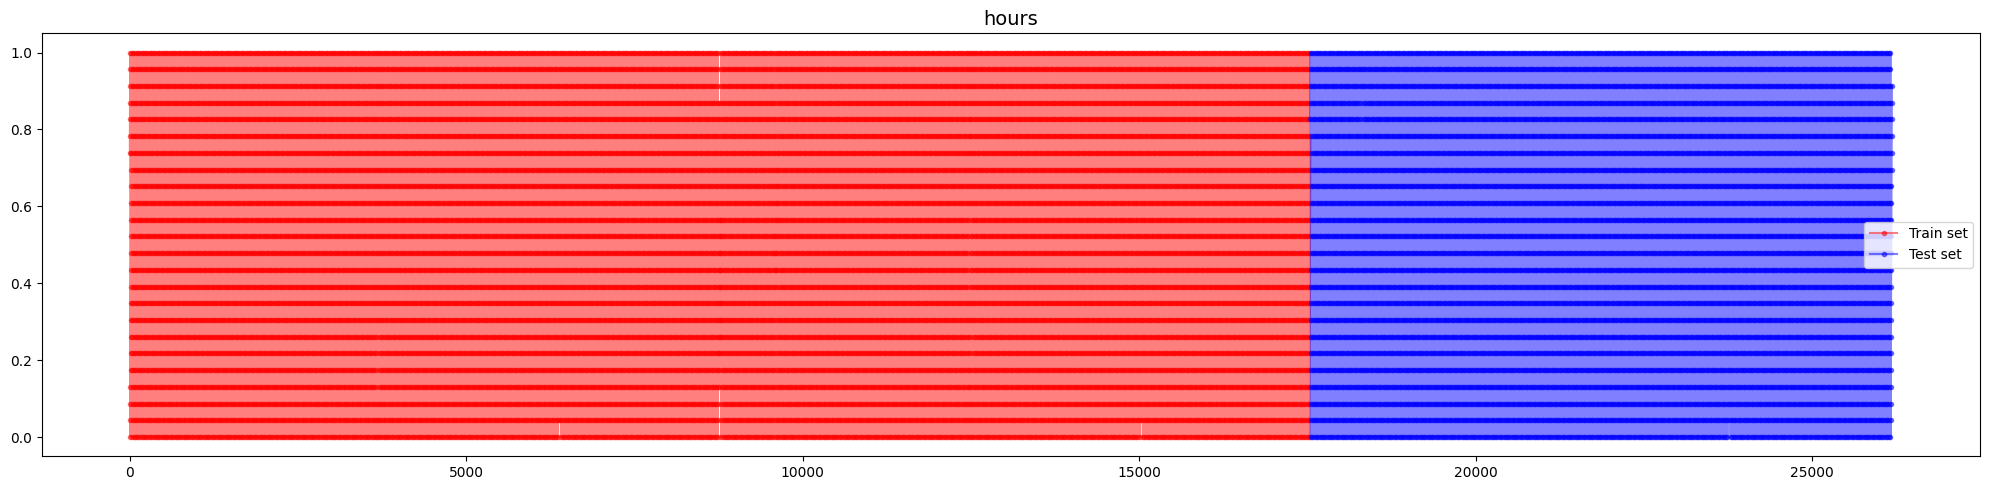

In [11]:
# Créer une liste pour l'abscisse  des graphes  
abs_liste_1=[]
for k in range (len(x_train_scaled)):
    abs_liste_1.append(k)

abs_liste_2=[]
for k in range (len(x_train_scaled),len(x_train_scaled)+len(x_test_scaled)):
    abs_liste_2.append(k)

# Trace les différents features train/test
for i in range(len(features)):
    plt.figure(figsize=(20,5))
    plt.plot(abs_liste_1,x_train_scaled[:,i], '.-', color='red', label='Train set', alpha=0.5)
    plt.plot(abs_liste_2,x_test_scaled[:,i], '.-', color='blue', label='Test set', alpha=0.5)
    plt.legend()
    plt.title(features[i], fontsize=14)
    title = plt.gca().get_title()
    output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
    ma_bibliotheque.save_figure(title, output_dir)
    plt.tight_layout()
    plt.show()


Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Consommation_brute_électricité_(MW)_-_RTE.png


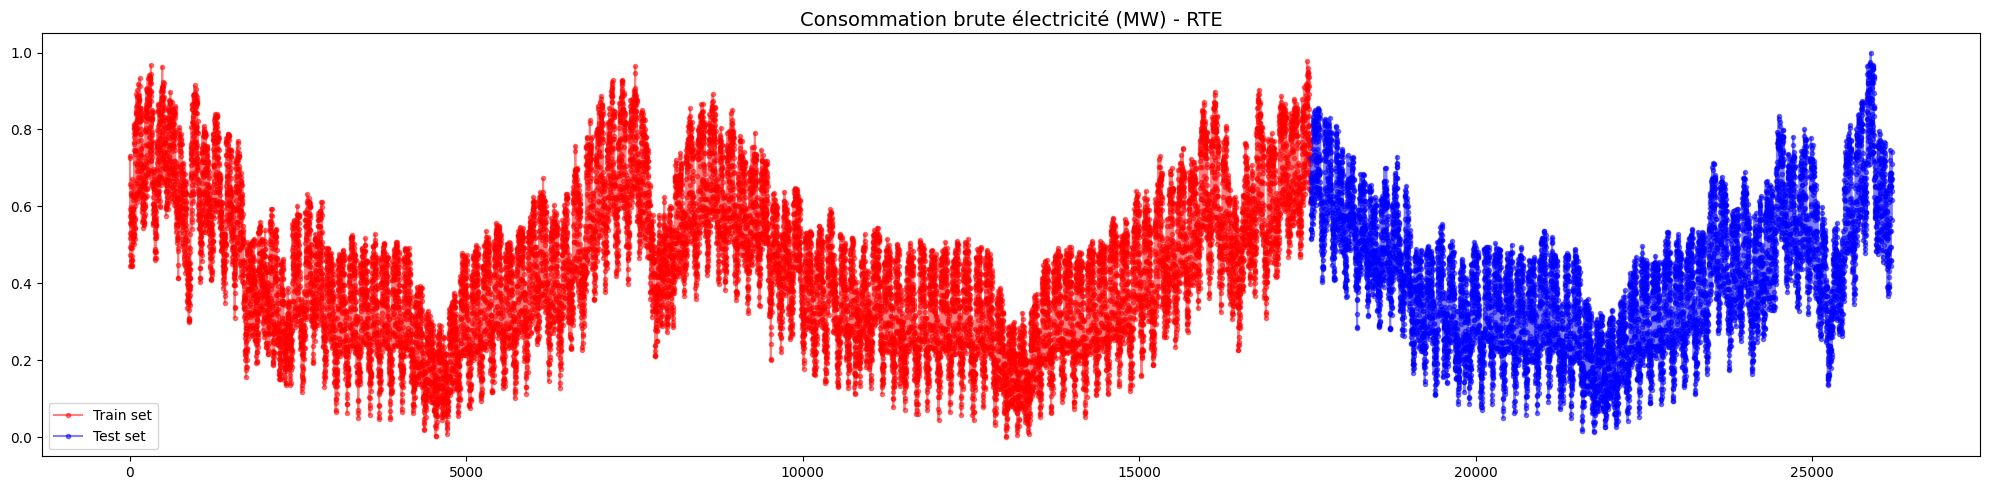

In [12]:
plt.figure(figsize=(20,5))
plt.plot(abs_liste_1,y_train_scaled[:], '.-', color='red', label='Train set', alpha=0.5)
plt.plot(abs_liste_2,y_test_scaled[:], '.-', color='blue', label='Test set', alpha=0.5)
plt.legend()
plt.title(labels, fontsize=14)
plt.tight_layout()
title = plt.gca().get_title()
output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
ma_bibliotheque.save_figure(title, output_dir)
plt.show()

## Model

In [13]:
def batch_generator(batch_size, sequence_length, num_features, num_labels, num_test, x, y):
    """
    Generator function for creating random batches of training-data.
    """

    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_features)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_labels)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
   
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            if num_test<sequence_length:
                print("there will be a problem test too short", num_test)
            idx = np.random.randint(num_test - 2*sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x[idx:idx+sequence_length]
            y_batch[i] = y[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [14]:
#Vérification de l'utilisation du GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [15]:
from tensorflow.keras.utils import Progbar
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [16]:
# Hyperparameters
num_neurons = 100 #150
learning_rate = 0.001
num_layers = 4 #5
num_iter = 100
keep_prob = 0.2

In [17]:
# Assuming sequence_length, num_features, num_labels, generator, testgenerator are defined

num_features = 9      # Example placeholder value
num_labels = 1         # Example placeholder value

In [18]:
# Build the model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(168,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(num_labels))

2024-11-13 13:55:29.779865: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-13 13:55:29.779893: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-11-13 13:55:29.779903: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-11-13 13:55:29.779924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-13 13:55:29.779938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/eliotsouthon/Desktop/POC/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using S

In [19]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')

In [20]:
# Initialize progress bar
progbar = Progbar(num_iter)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 168, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,185 (645.25 KB)

 Trainable params: 165,185 (645.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_history=model.fit(x_train_scaled,y_train_scaled,validation_data=(x_test_scaled,y_test_scaled),epochs=15,batch_size=64)

Epoch 1/15


2024-11-13 13:55:30.655989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


275/275 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0528 - val_loss: 0.0280
Epoch 2/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0329 - val_loss: 0.0267
Epoch 3/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0280 - val_loss: 0.0241
Epoch 4/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0262 - val_loss: 0.0253
Epoch 5/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0252 - val_loss: 0.0231
Epoch 6/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0251 - val_loss: 0.0240
Epoch 7/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0245 - val_loss: 0.0221
Epoch 8/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0240 - val_loss: 0.0226
Epoch 9/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0201 - val_loss: 0.0104
Epoch 10/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0101 - val_loss: 0.0087
Epoch 11/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0080 - val_loss: 0.0084
Epoch 12/15
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/ste

In [23]:
model.save('/Users/eliotsouthon/Desktop/POC/POC/model_save/modele_sauvegarde.h5')

Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Train_loss.png


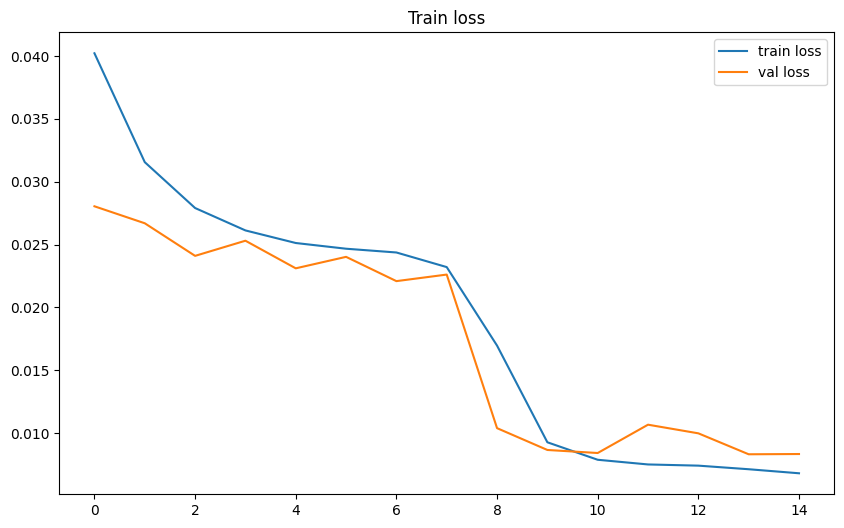

In [24]:
plt.figure(figsize=[10,6])
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.title('Train loss')
plt.legend()
title = plt.gca().get_title()
output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
ma_bibliotheque.save_figure(title, output_dir)
plt.show()

## Prediction

In [50]:
# Charger le modèle sauvegardé avec TensorFlow
model = tf.keras.models.load_model('/Users/eliotsouthon/Desktop/POC/POC/model_save/modele_sauvegarde.h5')

In [81]:
# Charger le fichier CSV avec Pandas
data = pd.read_csv('/Users/eliotsouthon/Desktop/POC/POC/Data/05_Data_for_prediction/w_api.csv', sep=';',encoding='utf-8')
data.head()

# Récuprère les dates officielles
data_raw = pd.read_csv('/Users/eliotsouthon/Desktop/POC/POC/Code/API_weather/weather_forecast_24h.csv', sep=';',encoding='utf-8')
data_raw['date'] = pd.to_datetime(data_raw['date'])

In [83]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)
features_scaled

array([[ 2.17380844, -0.7617004 , -0.45317937, ..., -0.16653291,
         0.        ,  0.65299626],
       [ 1.86917992, -0.51910756, -0.50442866, ..., -0.16653291,
         0.        ,  0.79648519],
       [ 1.56455141, -0.27651472, -0.55567794, ..., -0.16653291,
         0.        ,  0.93997413],
       ...,
       [-0.66329848, -0.31694686,  2.69657397, ..., -1.0597549 ,
         0.        , -0.06444842],
       [-1.44720919,  0.37039952,  2.51373868, ..., -1.0597549 ,
         0.        ,  0.07904052],
       [-2.23111991,  1.0577459 ,  2.33090339, ..., -1.0597549 ,
         0.        ,  0.22252945]])

In [84]:
# Faire des prédictions avec le modèle
predictions = model.predict(features_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Figure sauvegardée dans /Users/eliotsouthon/Desktop/POC/Images/Prédictions_de_consommation_sur_5_jours_(heure_par_heure)_à_partir_de_prédiction_météologique_OpenWeatherMap.png


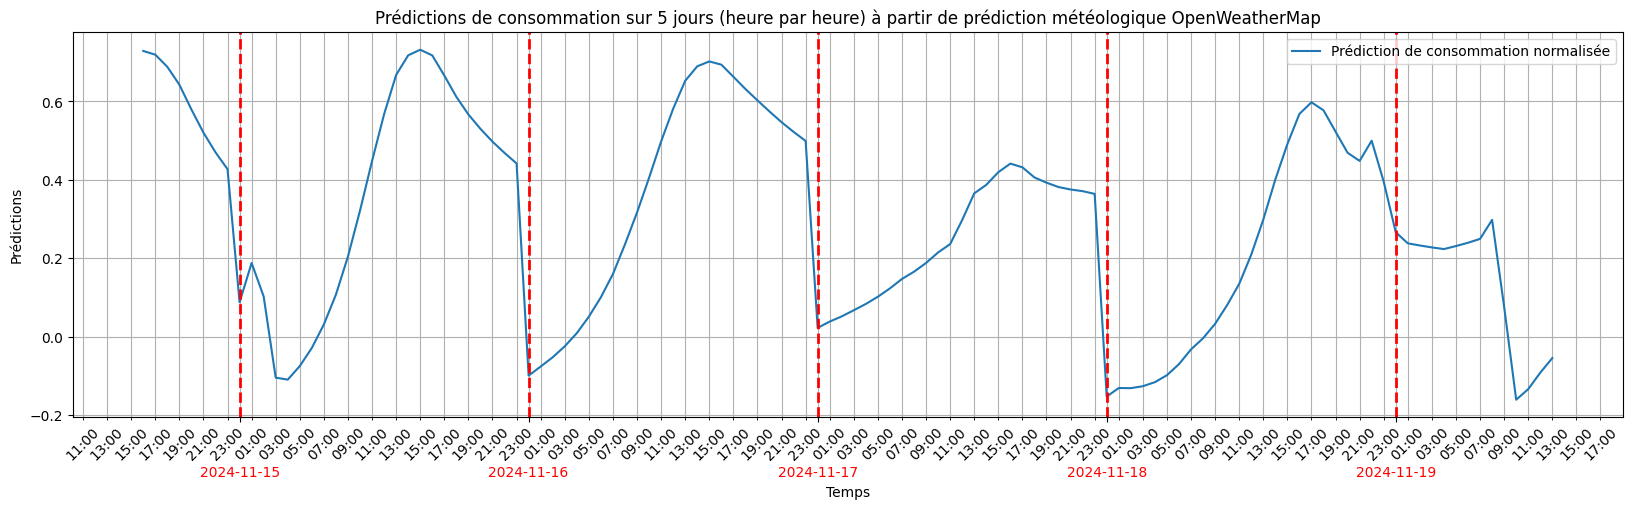

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Tracer le graphique
plt.figure(figsize=(20, 5))
plt.plot(data_raw['date'], predictions, label='Prédiction de consommation normalisée')  # Assurez-vous que 'predictions' correspond à la longueur de 'data_raw['date']'

# Définir le format des dates
plt.xlabel('Temps')
plt.ylabel('Prédictions')
plt.title('Prédictions de consommation sur 5 jours (heure par heure) à partir de prédiction météologique OpenWeatherMap')

# Modifier les ticks de l'axe des x pour afficher toutes les 24 heures + heure toutes les 2h
plt.xticks(rotation=0)  # Ne pas incliner les labels des dates principales

# Définir les ticks principaux (tous les jours)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Un tick toutes les 24h
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format de la date

# Ajouter une deuxième ligne d'abscisse pour l'heure toutes les 2 heures
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=2))  # Ticks toutes les 2 heures
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Format de l'heure

# Rotation des labels des heures mineures pour une meilleure lisibilité
plt.gca().tick_params(axis='x', which='minor', rotation=45)  # Rotation des labels des heures mineures

# Activer la grille pour les ticks mineurs (heures)
plt.grid(True, which='both')

# Ajouter des lignes de grille rouges et modifier les dates du début de jour
ax = plt.gca()
for date in data_raw['date']:
    if date.hour == 0 and date.minute == 0:  # Si c'est le début d'un nouveau jour
        # Ajouter une ligne verticale rouge
        ax.axvline(x=date, color='red', linestyle='--', lw=2)  # Ajouter une ligne verticale rouge

        # Mettre la date en rouge sur l'axe des x et décaler les dates en dessous
        tick_labels = ax.get_xticklabels()
        for label in tick_labels:
            if label.get_text() == date.strftime('%Y-%m-%d'):
                label.set_color('red')  # Mettre en rouge la date du début de jour
                label.set_position((label.get_position()[0], -0.10))  # Déplacer la date 10 points plus bas

# Ajouter la légende en haut à droite
plt.legend(loc='upper right')
title = plt.gca().get_title()
output_dir = "/Users/eliotsouthon/Desktop/POC/Images"
ma_bibliotheque.save_figure(title, output_dir)

plt.show()